# Project Title (Topic):<font color='red'> Add title

#### Group members (Section 003):
##### Cici Liu 77155471
##### Jingyuan Liu 69763183
##### Zefan Liu 17237355
##### Jinyi Wu 28812972

<img src="https://m.media-amazon.com/images/G/15/gc/designs/livepreview/amazon_dkblue_noto_email_v2016_ca-main._CB468775011_.png" />

## Introduction:
Online shopping has been a prevalent behavior worldwide, and how prices and sales volume of online goods are associated with consumer behaviors and profit optimization has also become a popular topic in both economics and machine learning. In particular, with traditional economic models, we may ignore some important lurking information behind the data, such as what dominates the variances between sale information of goods, how these goods are naturally clustered, and how people’s rating on a good affects the discounted price. Insights into these topics may help us reveal the deeper economic pattern of selling and purchasing in online shopping.

This project aims to study the impact of consumer behavior, prices, and sales volume on product sales and profit optimization in online shopping. We choose the ["Amazon Sales Dataset" from Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) data, which contains over 1K+ ratings and reviews for Amazon products listed on the official website of Amazon India. This dataset provides credible and valid data and has very few missing values. It contains a category variable and several useful numerical variables such as discounted price, actual price, rating, and the number of ratings. The dataset provides insight into the online shopping market and consumer behaviors that can help us uncover deep economic patterns in online sales and purchases.

## Preliminary Analysis:

#### Import useful packages, run this cell before proceed!

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import patsy
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
import plotly.graph_objs as go
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
%matplotlib inline

#### Download the [raw data](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) from the web and read in the data by its [URL](https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv) -- this will take a couple seconds.

In [65]:
url = "https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv"
amazon_raw = pd.read_csv(url)
amazon_raw.info()
amazon_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

As can be seen, the column names of variables in this dataset are rather intuitive and descriptive, so we did not add further explanation to each variable.

#### Data Cleaning
By cleaning the dataset, we remove the columns that are not useful for analysis; we convert all numeric columns from a string type to a float type. Notice that all prices in this dataset are measured in "₹" (Indian rupee). The `discount_percentage` column is scaled to the interval [0,1]. Namely, we obtain the relationship `discounted price` $\approx$ `actual price` $\times$ (1 - `discount_percentage`) (note: this equality may not be exact due to measurement error).

In [66]:
# Remove unnecessary columns
amazon_clean = amazon_raw[['category', 'discounted_price', 'actual_price', 'discount_percentage',
                           'rating', 'rating_count', 'user_id', 'review_title']]
# Type conversions
for col in ["discounted_price", "actual_price", "rating_count"]:
    amazon_clean[col] = amazon_clean[col].str.replace("₹", "")
    amazon_clean[col] = amazon_clean[col].str.replace(",", "")
amazon_clean["discount_percentage"] = amazon_clean["discount_percentage"].str.replace("%", "")
amazon_clean['rating'] = amazon_clean["rating"].str.replace("|", "")

amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]] = amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]].apply(pd.to_numeric, errors='coerce')

amazon_clean['discount_percentage']=amazon_clean['discount_percentage']/100

amazon_clean.info()
amazon_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1464 non-null   float64
 5   rating_count         1463 non-null   float64
 6   user_id              1465 non-null   object 
 7   review_title         1465 non-null   object 
dtypes: float64(5), object(3)
memory usage: 91.7+ KB


category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0                 0.43     4.0       43994.0   
2        1899.0                 0.90     3.9        7928.0   
3         699.0                 0.53     4.2       94363.0   
4         399.0                 0.61     4.2       16905.0   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                        review_title  
0  Satisfied,Charging is really fast,Value for mo...  
1  A Good Braided Cable for Your Type C Device,Go...  
2  Good speed for earlier versions,Good Product,W...  
3  Good product,Good one,Nice,Really nice product...  
4  As good as original,Decent,Good one for second...

#### Preliminary visualization on the distribution for each numerical column.

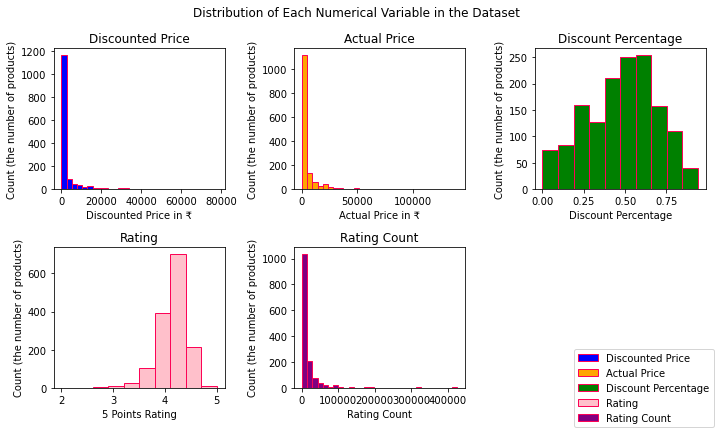

In [67]:
### A first simple visualization on the distribution for each numerical columns.
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs[0, 0].hist(amazon_clean['discounted_price'], color = 'blue', bins=30, edgecolor='#fc0356')
axs[0, 0].set_title('Discounted Price')
axs[0, 0].set_xlabel('Discounted Price in ₹')
axs[0, 0].set_ylabel('Count (the number of products)')
axs[0, 1].hist(amazon_clean['actual_price'], color = 'orange', bins=30, edgecolor='#fc0356')
axs[0, 1].set_title('Actual Price')
axs[0, 1].set_xlabel('Actual Price in ₹')
axs[0, 1].set_ylabel('Count (the number of products)')
axs[0, 2].hist(amazon_clean['discount_percentage'], color = 'green', edgecolor='#fc0356')
axs[0, 2].set_title('Discount Percentage')
axs[0, 2].set_xlabel('Discount Percentage')
axs[0, 2].set_ylabel('Count (the number of products)')
axs[1, 0].hist(amazon_clean['rating'], color = 'pink', edgecolor='#fc0356')
axs[1, 0].set_title('Rating')
axs[1, 0].set_xlabel('5 Points Rating')
axs[1, 0].set_ylabel('Count (the number of products)')
axs[1, 1].hist(amazon_clean['rating_count'], color = 'purple', bins=30, edgecolor='#fc0356')
axs[1, 1].set_title('Rating Count')
axs[1, 1].set_xlabel('Rating Count')
axs[1, 1].set_ylabel('Count (the number of products)')
axs[1, 2].remove()
fig.suptitle('Distribution of Each Numerical Variable in the Dataset')
fig.legend(['Discounted Price', 'Actual Price', 'Discount Percentage', 'Rating', 'Rating Count'], loc='lower right')
plt.tight_layout()
plt.show()

In [68]:
amazon_clean.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635             0.476915     4.096585   
std         6944.304394   10874.826864             0.216359     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000

Based on the five histograms, we can observe some common features. First of all, the distributions of `Discounted Price`, `Actual Price`, and `Rating Count` are all right-skewed. Most observations fall into the first bar, while very small portions of the observations have relatively large values, which makes the histograms skew to the right.
In specific, the result from the summary table suggests that 75% of discounted price fall below 2000 rupees, 75% of actual price are below 4500 rupees, and 75% of products have fewer than 18,000 reviews (this leads us to choose smaller bin widths of the histograms). 

The `Rating` and `Discount Percentage` plots have a more normal and slightly left-skewed distribution centering around 4.1 points and 50% based on the mean and median from the table, respectively.

##### Missing value

In [69]:
amazon_clean.isnull().sum()

category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
user_id                0
review_title           0
dtype: int64

The `count` row of the summary table suggests that missing values may exist. The above code directly points out that there are at most 3 missing values in our data set. Because of a small number of null values, we will filter out the missing values, which should not have a significant impact on our analytical result.

In our regression model, the response variable is `rating_count`. In our project, we aim to explore the mutual relationship between prices, ratings, and sales volume. Therefore, we consider rating count (the number of ratings) as a decent approximation of the sales volume. However, this assumption may not be entirely suitable in practice since we need to take into account response and non-response biases in online shopping behaviors. For example, customers with stronger opinions on a product tend to rate it online, which will result in those very good and very bad products having more rating counts than those that are just average. 

## Exploratory Data Analysis: PCA 

Intuitively speaking, the price, volume of sale and customers' ratings of a good are always inter-correlated. For instance, if a good is sold at a relatively low price and customers' experience of using such a good is still above the average, then reasonably the competitivity of this good would be guaranteed and the sale volume would be predicted to relatively high. 

Therefore, in order to investigate the how the variations between goods are contributed by the combination of price, sale volume and customers' rating, on our second last stage of Exploratory Data Analysis, we decide to conduct Principal Component Analysis on our data. We would assume that our data approximately lies on a hyperplane and Euclidean distance would be used. Note that we would exclude the categorical variable "category" from our data.

Data preprocessing is important. Usually PCA is conducted through applying Singular Value Decomposition(SVD) on the centered data or applying Eigenvalue Decomposition on the covariance matrix of the centered data, and thus centering will be necessary. Meanwhile, the unit of variable may influence the performance of PCA since variable in larger scale usually contribute more on the overall variation, and thus we may also scale the centered data. In other words, standardization is required. Meanwhile, ourliers would greatly affect the performance of PCA as well, and so they would be excluded before conducting PCA. Last but not least, standard PCA doesn't apply to data with missing value, but fortunately normalization would help us get rid of rows with missing values.

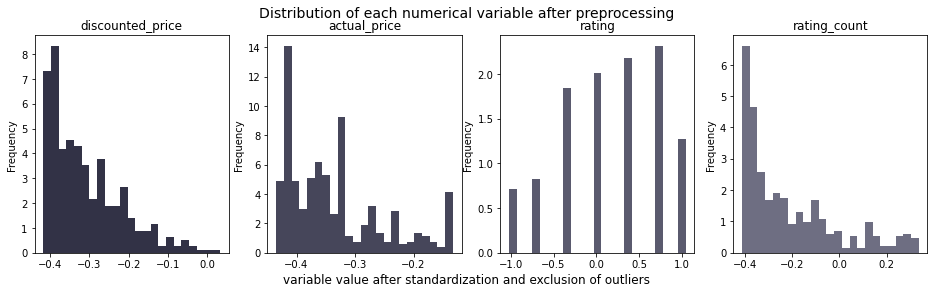

In [70]:
amazon_filtered = amazon_clean[["discounted_price", "actual_price", "rating", "rating_count"]]
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
amazon_filtered_normalized = StandardScaler().fit_transform(amazon_filtered)
amazon_filtered_normalized = pd.DataFrame(amazon_filtered_normalized).rename(columns = {0:"discounted_price", 
                                                                                        1:"actual_price", 
                                                                                        2:"rating", 
                                                                                        3:"rating_count"})
# Remove the outliers in data, where the interval is between 0.15 quantile and 0.85 quantile in each column
for i in range(4):
    amazon_filtered_normalized = amazon_filtered_normalized[amazon_filtered_normalized.iloc[:,i].between(amazon_filtered_normalized.iloc[:,i].quantile(.15), amazon_filtered_normalized.iloc[:,i].quantile(.85))]
# Using side-by-side histograms to visualize the distribution of the preprocessed variables
figure, ax = plt.subplots(1,4, figsize = (16,4))
figure.suptitle("Distribution of each numerical variable after preprocessing", size=14)
figure.supxlabel("variable value after standardization and exclusion of outliers")
for i in range(4):
    amazon_filtered_normalized.iloc[:,i].plot(
    kind="hist", y=amazon_filtered_normalized.iloc[:,i].name, color=((20*i+50)/255, (20*i+50)/255, (20*i+70)/255),
    bins=23, legend=False, density=True, ax=ax[i])
    ax[i].set_title(amazon_filtered_normalized.iloc[:,i].name)

We can see except for rating, the three plots left are all right skewed. This phenomenon will be useful later.

In [71]:
# Apply the PCA on preprocessed data
from sklearn.decomposition import PCA
pca_amazon = PCA(n_components=4)
PCA_fit_Amazon = pca_amazon.fit_transform(amazon_filtered_normalized)

Determining the number of principal components K involved would be the next stage of PCA, and it is usually measured by the proportion of variation explained by each PC. There are actually many methods that have been proposed to determine the optimal K for PCs, where some of them are more EDA-based and some of them take randomness and the prediction ability of PCA into considerations. From the perspective of EDA, scree-test/scree-plot is one of the most popular and widely-used methods. If it is hard to draw conclusion from scree-plot, then alternatively we can pick the PCs whose eigenvalues is larger than average, which is always 1 in this context.

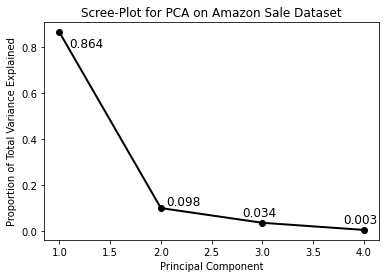

In [72]:
# The scree-plot of PCA (basically no need to check eigenvalues)
fig, ax = plt.subplots(figsize=(6,4))
PC_values = np.arange(pca_amazon.n_components_) + 1
plt.plot(PC_values, pca_amazon.explained_variance_ratio_, 'o-', linewidth=2, color='black')
plt.title('Scree-Plot for PCA on Amazon Sale Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Total Variance Explained')
for index in range(len(PC_values)):
    if index ==1:
            ax.text(2.05, 0.11, 
            round(pca_amazon.explained_variance_ratio_[index],3), 
            size=12)
    elif index ==0:
            ax.text(1.1, 0.8, 
            round(pca_amazon.explained_variance_ratio_[index],3), 
            size=12)
    else:
        ax.text(PC_values[index]-0.2, 
                pca_amazon.explained_variance_ratio_[index]+0.03, 
                round(pca_amazon.explained_variance_ratio_[index],3), 
                size=12)
plt.show()

Based on the scree-plot, there is an apparent elbow point at p=2, and the total variation explained by the first two principal components would be 86.4% + 9.8% = 96.2%, which is fairly reasonable. On average, the contribution of each eigenvalue should be 25%. We can see that only first PC contributed more than that, but it will be very risky to leave only one principal component. Therefore, we would keep PC1 and PC2.

Also, back to our motivation to conduct PCA, the most we wonder is how price, rating and rating counts contribute to those important principal components. For this, we may check the coefficients of each variable in the loading of each PC.

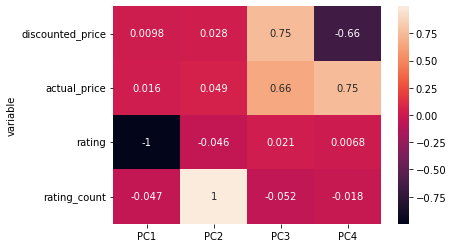

In [73]:
# Illustrate the loadings for each PC, which is the correlation between raw variables and principal components
PCA_Amazon_loading = pca_amazon.components_
PC_list_in_string = ["PC"+str(i) for i in list(range(1, 5))]
PCA_Amazon_loading_df = pd.DataFrame.from_dict(dict(zip(PC_list_in_string, PCA_Amazon_loading)))
PCA_Amazon_loading_df['variable'] = amazon_filtered_normalized.columns.values
PCA_Amazon_loading_df = PCA_Amazon_loading_df.set_index('variable')
PCA_Amazon_loading_df
ax = sns.heatmap(PCA_Amazon_loading_df, annot=True)
plt.show()

As we can see in the loading plot, PC1 is mainly determined by rating, and PC2 is maining determined by rating count. Since based on the scree-plot above the first two PCs are capable to explain around 96% percent of the variation, we may say that rating and rating_count are the main contributors to the difference between these goods. 

Meanwhile, another implication is that if we are going to establish any regression model for our data, then it is reasonable to believe that rating and rating_count would be more likely to be statistically significant variables

## Exploratory Data Analysis: Clustering

Besides how the variation of data can be decomposed, we are also interested in if the variation in data lead to specific structure of data in the context of price and customers' feedback, where another unsupervised learning method may be explored: clustering. Clustering is usually used to determine how points can form different clusters based on their similarity. The most popular methods may be K-means clustering, Guassian model-based clustering and hierarchical clutering may. Considering that we lack the evidence for the assumption that data is generated under a mixture of guassian distributions, and the visualization of hierarchical clustering may be blurred, K-means clustering seems to be an appropriate choice here.

Note that since our data is in relatively low dimensionality, we would rather applying clustering to raw variables instead of principle components, and it is always helpful for our interpretations. Also, since clustering is also based on the Euclidean distance between data points, standardization is still necessary.

The result of clustering should be intuitively interpretable, but the randomness in selecting the initial centriods to start may lead to results that are counter-intuitive, so for each number of cluster we may need to run the code multiple times. Meanwhile, we also need to determine the best number of clusters fitted. Usually the criterions can be CH index or within-cluster sum of squared distance. Here we would use the latter.

In [74]:
# import necessary package
from sklearn.cluster import KMeans
# For k from 2 to 8, run k-means clustering on data for 15 times
k_range = np.arange(2,9)
mean_wcss = np.zeros(7)
for k in range(2,9):
    wcss_value_store = np.zeros(15)
    for i in range(15):
        model = KMeans(n_clusters=k, 
                       random_state=i,
                       max_iter=200) 
        amazon_kmeans = model.fit(amazon_filtered_normalized)
        wcss_value_store[i] = amazon_kmeans.inertia_
    mean_wcss[k-2] = wcss_value_store.mean()

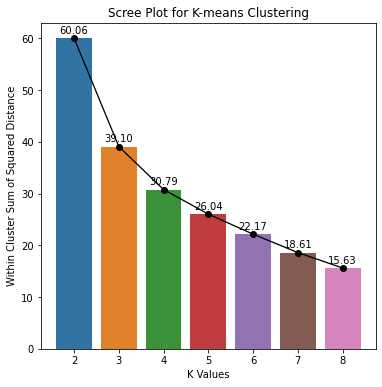

In [75]:
# Create a data frame to store the k and corresponding within-cluster sum of squared distance
wcss_against_k = pd.DataFrame(mean_wcss, columns = ["Within Cluster Sum of Squared Distance"])
wcss_against_k["K Values"] = k_range
wcss_against_k = wcss_against_k.sort_values(["Within Cluster Sum of Squared Distance"], ascending=False)

# Using bar-plot 
plt.figure(figsize=(6, 6))
amazon_bar_plots = sns.barplot(x="K Values", y="Within Cluster Sum of Squared Distance", data=wcss_against_k)
for bar in amazon_bar_plots.patches:
    amazon_bar_plots.annotate(format(bar.get_height(), '.2f'),
                              (bar.get_x() + bar.get_width() / 2,
                               bar.get_height()), 
                              ha='center', va='center',
                              size=10, xytext=(0, 8), textcoords='offset points')
plt.title("Scree Plot for K-means Clustering")
plt.plot(k_range-2, mean_wcss, 'o-', linewidth=1.3, color = "black")

Based on the scree-plot, it is relatively blur to determine the elbow-point here. It may be safe to say that the the elbow-point is at k equal to 3 (4 may also work, but the largest drop is at 3), and we are going to validate the result with our intuition.

As what we emphasized before, the intuitive interpretation of clustering output matters. However, it would be visually difficult to examine the reasonability of result, since the dimensionality of data is larger than 3. Considering that for customers discounted price may be more important, we may only use discounted_price, rating and rating_count as axis to visualize the clustering result for further interpretation, and we will repeatedly fit clusters until there is feasible interpretation for the clustering result.

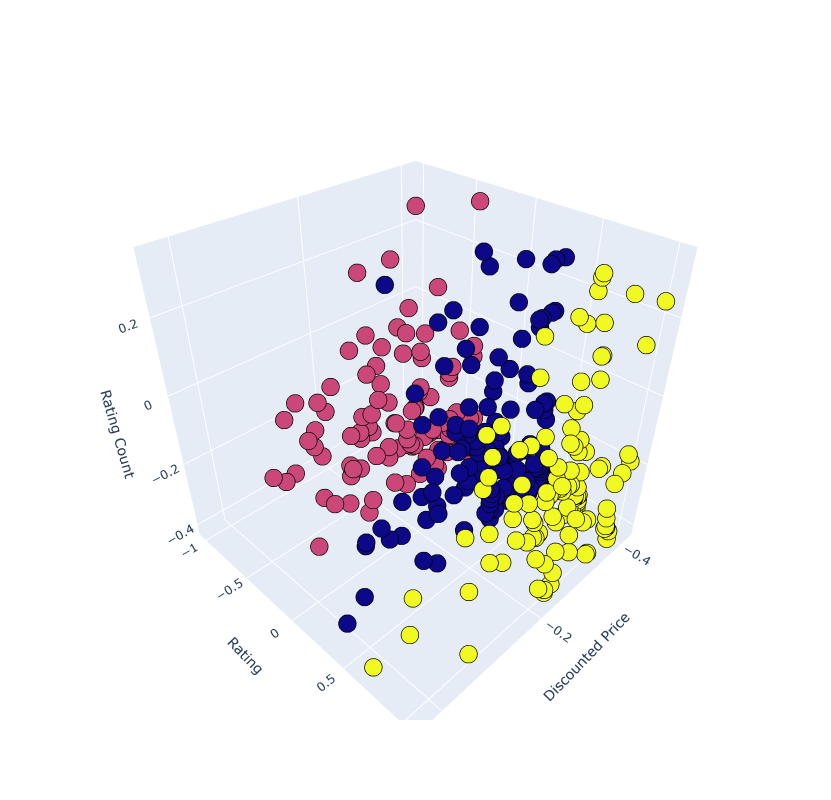

<Figure size 504x504 with 0 Axes>

In [76]:
# train a K-means model using the filtered data, and mutate the data
kmeans_optimal = KMeans(n_clusters=3, init="random", max_iter=200) 
amazon_kmeans_optimal = kmeans_optimal.fit(amazon_filtered_normalized)
amazon_kmeans_for_plot = amazon_filtered_normalized.copy()
amazon_kmeans_for_plot["cluster"] = amazon_kmeans_optimal.labels_+1
amazon_kmeans_for_plot_short = amazon_kmeans_for_plot.drop(columns = "actual_price")

# use a 3D plot to visualize the result of clustering
import plotly.graph_objs as go
fig = plt.figure(figsize = (7,7))
discounted_price = np.array(amazon_kmeans_for_plot_short['discounted_price'])
rating = np.array(amazon_kmeans_for_plot_short['rating'])
rating_count = np.array(amazon_kmeans_for_plot_short['rating_count'])
Trace = go.Scatter3d(x=discounted_price, y=rating, z=rating_count, 
                     mode='markers',
                     marker=dict(color = amazon_kmeans_for_plot_short["cluster"], size= 10, 
                                 line=dict(color= 'black',width = 10)))
Scene = dict(xaxis = dict(title  = 'Discounted Price'),
             yaxis = dict(title  = 'Rating'),
             zaxis = dict(title  = 'Rating Count'))
Layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 800, width = 800)
fig = go.Figure(data = Trace, layout = Layout)
fig.show()

We noticed that no matter how many times we run the K-means clustering, the results will be similar and it is rating that mainly determines the relative positions of clusters. Note that we are not superised about such a pattern, such the result of clustering reaches a consistency with the result of principal component analysis: from PCA we know that it is mainly rating (and partially rating count) that determines the variation in our data. Therefore, it is reasonable to see that the interior structure in data, which we defined as clusters here, is dominated by rating, and there is no need to examine other clustering algorithm on our data.

actual_price             AxesSubplot(0.1,0.15;0.173913x0.75)
discounted_price    AxesSubplot(0.308696,0.15;0.173913x0.75)
rating              AxesSubplot(0.517391,0.15;0.173913x0.75)
rating_count        AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

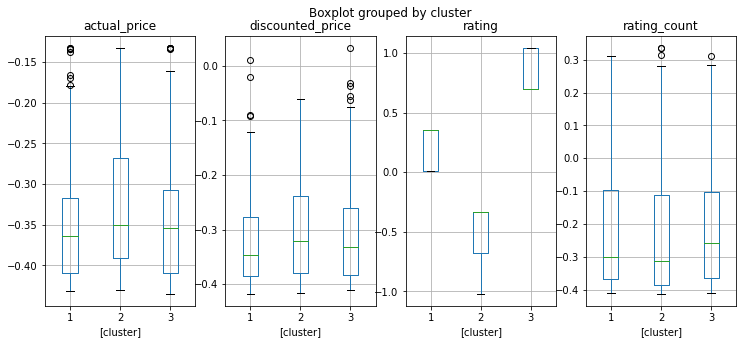

In [77]:
# use side-by-side plots to illustrate the difference in different clusters
fig, axes = plt.subplots(ncols=4, figsize=(12, 5), sharey=False)
amazon_kmeans_for_plot.boxplot(by='cluster', return_type='axes', ax=axes)

Again, the results shown by boxplots are consistent with the results of PCA and Clustering. We can clearly observe that for actual price, discounted price and rating count, the majority of points are distributed under the mean, which implicitly matches with the skewness of those histograms above. Note that the outliers here are the outliers after the raw outliers are excluded, which indicates that for these three variables it is several high outliers that balance with the the rest of data points.

## Regression

According to the histogram, the distributions of `Discounted Price`, `Actual Price`, and `Rating Count` are highly right-skewed, indicating some extreme outliers in the upper trend may exist in our data. Since it may affect our predictive accuracy, we decide to filter our the outliers before analysis.

In [78]:
count_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['rating_count'], 90)
discountprice_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['discounted_price'], 90)
price_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['actual_price'], 90)

amazon_clean = amazon_clean[(amazon_clean['discounted_price'] <= discountprice_90_percentile) &
                             (amazon_clean['rating_count'] <= count_90_percentile) & 
                             (amazon_clean['actual_price'] <= price_90_percentile)]

To predict the sales volume, we will first apply the most straightforward model of linear regression, using discount percentage, discounted price, and rating as regressors. We start with the simple regression.

### Simple Regression

#### Train-test split

In [79]:
train = amazon_clean.sample(frac = 0.8,random_state = 323) 
test = amazon_clean.drop(train.index)
y_train = amazon_clean.loc[train.index][amazon_clean.notnull().all(1)]['rating_count']
X_train = amazon_clean.loc[train.index][amazon_clean.notnull().all(1)][['discount_percentage',
                                                                        'discounted_price',
                                                                        'actual_price','rating']]
y_test = amazon_clean.loc[test.index][amazon_clean.notnull().all(1)]['rating_count']
X_test = amazon_clean.loc[test.index][amazon_clean.notnull().all(1)][['discount_percentage',
                                                                      'discounted_price',
                                                                      'actual_price','rating']]
train_data = pd.concat([X_train, y_train],axis=1)
test_data = pd.concat([X_test, y_test],axis=1)

#### Regression on `rating`

The primary regressor of interest is `rating`. This choice will be clear in the later multiple regression section, though we still include the visualization for simple regressions on other explanatory variables in this section.

In [80]:
single_lr_model = linear_model.LinearRegression()
single_lr_model.fit(X =X_train[['rating']], 
             y = y_train)
beta_0_single = single_lr_model.intercept_
beta_1_single = single_lr_model.coef_[0]
print(f"Fit model: rating_count = {beta_0_single} + {beta_1_single} rating")

Fit model: rating_count = -14545.682680785292 + 5439.310402263572 rating


In [81]:
train_mse_lr_single = metrics.mean_squared_error(y_train, single_lr_model.predict(X_train[['rating']]))
test_mse_lr_single = metrics.mean_squared_error(y_test, single_lr_model.predict(X_test[['rating']]))

print(f'The MSE on the training data is {train_mse_lr_single}, and the MSE on the testing data is {test_mse_lr_single}.')

The MSE on the training data is 79983190.51026519, and the MSE on the testing data is 68670353.82500216.


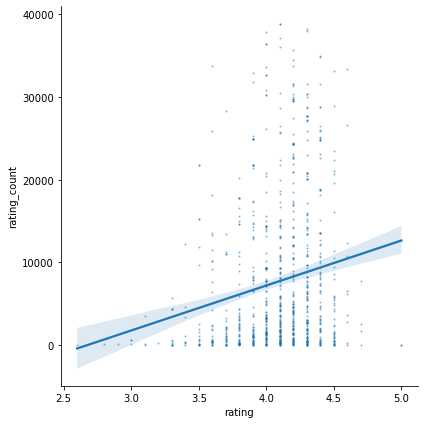

In [82]:
sns.lmplot(
    data=train_data, x="rating", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

The estimate and the upper slope indicate an increase of 5439 in sales volume with an additional increase in rating score.

#### Regression on other explanatory variables

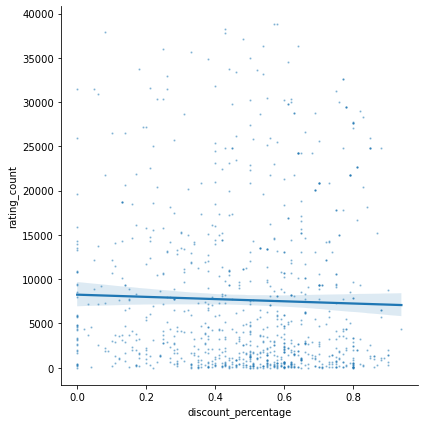

In [83]:
sns.lmplot(
    data=train_data, x="discount_percentage", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

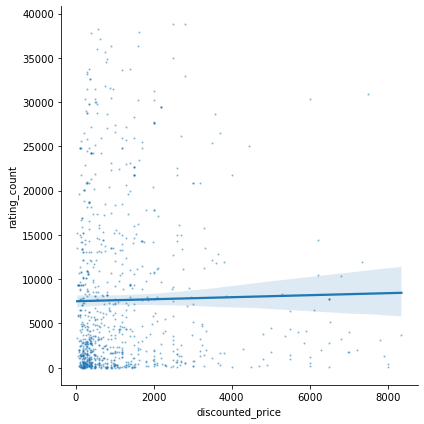

In [84]:
sns.lmplot(
    data=train_data, x="discounted_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

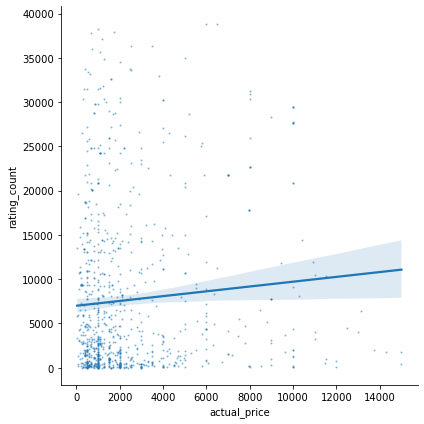

In [85]:
sns.lmplot(
    data=train_data, x="actual_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

According to the regression plots, 1 percent of increase in percentage point may lead to minor decrease in sales volume, and 1 rupee increase in actual price or discounted price will slightly induce increase in the sales volume. The result seems to be counter-intuitive and contradicts with the demand-supply economic model. Therefore, we will apply multiple regression in the following to see if any different outcomes may result.

### Multiple Regression

We regress the `rating_count` on all applied explanatory variables `discount_percentage`, `discounted_price`, and `rating` (since `actual_price` can be transformed from `discount_percentage` and `discounted_price`, we eliminate it here to avoid collinearity).

To have a further understanding of the statistical significance of different explanatory variables, we import the module `statsmodels`.

In [86]:
import statsmodels.api as sm

X = X_train[['discount_percentage', 'discounted_price', 'rating']]
y = y_train

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#store parameter estimates
beta_0_multi = model.params['const']
beta_1_multi = model.params['discount_percentage']
beta_2_multi = model.params['discounted_price']
beta_3_multi = model.params['rating']

#view fitted model
print(f"Fit model: rating_count = {beta_0_multi} + {beta_1_multi:.4f} discount_percentage + {beta_2_multi:.4f} discounted_price + {beta_3_multi:.4f} rating")

Fit model: rating_count = -14513.979822782647 + -58.1340 discount_percentage + 0.0656 discounted_price + 5419.6486 rating


The coefficient estimates of `discount_percentage` and `discounted_price` seem to contribute less to the `rating_count` compared with `rating`. We use the p-value to consolidate this finding below.

In [87]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           rating_count   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     9.966
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.81e-06
Time:                        23:21:32   Log-Likelihood:                -9760.3
No. Observations:                 928   AIC:                         1.953e+04
Df Residuals:                     924   BIC:                         1.955e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.451e+04   4

The coefficient estimates for `rating` is statistically significant in a very small significance level (0.000), while no evidence has been shown the effect of`discount_percentage` and `discounted_price` on `rating_count`. This implies that based on our data set, only the rating score has a predictive power to the sales volume, which is consistent to our previous PCA analysis.

In [88]:
train_mse_lr_multi = metrics.mean_squared_error(y_train, model.fittedvalues)

X_multi = sm.add_constant(X_test[['discount_percentage', 'discounted_price', 'rating']])
test_mse_lr_multi = metrics.mean_squared_error(y_test, model.predict(X_multi))

print(f'The MSE on the training data is {train_mse_lr_multi}, and the MSE on the testing data is {test_mse_lr_multi}.')

The MSE on the training data is 79973723.39472757, and the MSE on the testing data is 68716971.3816109.


The MSE for both training and testing data sets imply that the multiple regression does not display improved predictive performance from the previous simple regression on `rating` (training MSE holds constant at 80.0 million, and the testing MSE is still 68.7 million). Again, it shows that `rating` accounts for most of the predictive power in the sales volume.

#### Specification check: VIF test

A low explanatory power of other variables may raise the concern of potential collinearity problem. The following VIF test will address it, suggesting collinearity is not an issue that would interrupt our analysis.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

# calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# view VIF for each predictor variable 
print(vif_df)

              variable         VIF
0                const  212.669676
1  discount_percentage    1.094723
2     discounted_price    1.071390
3               rating    1.023510


The VIF values of three explanatory variables are all close to 1, implying weak or no correlation between the them.

## Regression Tree

The limited predictive power of simple/multiple regression leads us to adopt another regression method - regression tree - to predict the rating count. Based on the observation from our Multiple Regression section, the `rating` variable is the most significant explanatory variable on our response `rating_count`, therefore, we decide to include the `rating` column as one of the regressors in the tree as well. However, since the `rating` variable itself only takes discrete values for every 0.1 from 0 to 5, we decide to include another regressor `discount_percentage` in the tree to make the piecewise-constant rectangular regions more visible on a 3D plot. We decide to use these two variables as explanatory variables for another reason. Both variables are relatively more normally distributed. `rating` falls between 0 and 5 and `discount_percentage` falls between 0 and 1. Unlike price variables, `discount_percentage` and `rating` cannot have any dramatically large values that behave as an outlier, which has less effect on the overall prediction of the average behavior of `rating_count`.

We first fit the tree with `max_depth=3` and observe its MSE on the training and testing data separately.

In [90]:
# Maximum depth: 3
fitted_tree_3 = tree.DecisionTreeRegressor(max_depth=3).fit(X_train[['rating','discount_percentage']],y_train)
train_mse_tree_max3 = metrics.mean_squared_error(y_train, fitted_tree_3.predict(X_train[['rating','discount_percentage']]))
test_mse_tree_max3 = metrics.mean_squared_error(y_test, fitted_tree_3.predict(X_test[['rating','discount_percentage']]))

print(f'When the maximum depth is 3 layers, the MSE on the training data is {train_mse_tree_max3}, and the MSE on the testing  data is {test_mse_tree_max3}.')

When the maximum depth is 3 layers, the MSE on the training data is 76947899.74442373, and the MSE on the testing  data is 69418723.96887973.


When then make a 3D scatter plot of the training data with the best-fitted piecewise-constant rectangular regions from the `fitted_tree_3` model.

Since the 3D plot of a regression tree is strictly beyond the scope of the coding part of this course, we refer to some good examples from the Internet to write the codes below in order to showcase the fitted trees in our model. Some functions like `np.meshgrid`, `np.column_stack` and `.ravel()` are also beyond the scope of this course, we might not know the exact meaning of those functions but just follow the logic and steps from those online examples and tutorials to complete our codes. All the resources we used are included in the **Reference** section ([5] [6] [7]) of this project at the end. The main focus of this section is visualization rather than the actual codes, while we indeed write these and make sure they fit our data.

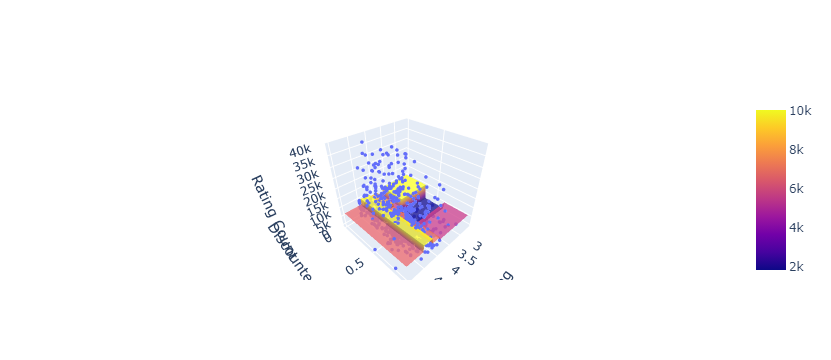

In [91]:
rating = np.linspace(X_train['rating'].min(), X_train['rating'].max(), 100)
percentage = np.linspace(X_train['discount_percentage'].min(), X_train['discount_percentage'].max(), 100)
rating_mesh_3, percentage_mesh_3 = np.meshgrid(rating, percentage)
X_pred_3 = np.column_stack((rating_mesh_3.ravel(), percentage_mesh_3.ravel()))
y_pred_3 = fitted_tree_3.predict(X_pred_3)
fig = go.Figure(data=[go.Scatter3d(x=X_train['rating'], y=X_train['discount_percentage'], z=y_train, mode='markers', marker=dict(size=2))])
fig.add_trace(go.Surface(x=rating_mesh_3, y=percentage_mesh_3, z=y_pred_3.reshape(percentage_mesh_3.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'))
fig.show()

Now let's see how these best-fitted piecewise-constant rectangular regions behave on the testing data. (The plot above include all observations from the training data with the rectangular regions, the plot below will show how does the regions match the observations from the testing data).

In [92]:
rating_mesh_3, percentage_mesh_3 = np.meshgrid(rating, percentage)
X_pred_3 = np.column_stack((rating_mesh_3.ravel(), percentage_mesh_3.ravel()))
y_pred_3 = fitted_tree_3.predict(X_pred_3)
fig = go.Figure(data=[go.Scatter3d(x=X_test['rating'], y=X_test['discount_percentage'], z=y_test, mode='markers', marker=dict(size=2, color = 'red'))])
fig.add_trace(go.Surface(x=rating_mesh_3, y=percentage_mesh_3, z=y_pred_3.reshape(percentage_mesh_3.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'))
fig.show()

Now we repeat exactly the same process but with `max_depth=10`.

In [93]:
# Maximum depth: 10
fitted_tree_10 = tree.DecisionTreeRegressor(max_depth=10).fit(X_train[['rating','discount_percentage']],y_train)
train_mse_tree_max10 = metrics.mean_squared_error(y_train, fitted_tree_10.predict(X_train[['rating','discount_percentage']]))
test_mse_tree_max10 = metrics.mean_squared_error(y_test, fitted_tree_10.predict(X_test[['rating','discount_percentage']]))
print(f'When the maximum depth is 10 layers, the MSE on the training data is {train_mse_tree_max10}, and the MSE on the testing  data is {test_mse_tree_max10}.')

# Plot the rectangular regions with training observations when maximum depth = 10.
rating_mesh_10, percentage_mesh_10 = np.meshgrid(rating, percentage)
X_pred_10 = np.column_stack((rating_mesh_10.ravel(), percentage_mesh_10.ravel()))
y_pred_10 = fitted_tree_10.predict(X_pred_10)
fig = go.Figure(data=[go.Scatter3d(x=X_train['rating'], y=X_train['discount_percentage'], z=y_train, mode='markers', marker=dict(size=2))])
fig.add_trace(go.Surface(x=rating_mesh_10, y=percentage_mesh_10, z=y_pred_10.reshape(percentage_mesh_10.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'),
                 title = 'Fitted rectangular regions with training observations when maximum depth = 10')
fig.show()

# Plot the rectangular regions with testing observations when maximum depth = 10.
fig = go.Figure(data=[go.Scatter3d(x=X_test['rating'], y=X_test['discount_percentage'], z=y_test, mode='markers', marker=dict(size=2, color = 'red'))])
fig.add_trace(go.Surface(x=rating_mesh_10, y=percentage_mesh_10, z=y_pred_10.reshape(percentage_mesh_10.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'),
                 title = 'Fitted rectangular regions with testing observations when maximum depth = 10')
fig.show()

When the maximum depth is 10 layers, the MSE on the training data is 48734046.05957872, and the MSE on the testing  data is 79289944.63473736.


What about `max_depth=50`?

In [94]:
# Maximum depth: 50
fitted_tree_50 = tree.DecisionTreeRegressor(max_depth=50).fit(X_train[['rating','discount_percentage']],y_train)
train_mse_tree_max50 = metrics.mean_squared_error(y_train, fitted_tree_50.predict(X_train[['rating','discount_percentage']]))
test_mse_tree_max50 = metrics.mean_squared_error(y_test, fitted_tree_50.predict(X_test[['rating','discount_percentage']]))
print(f'When the maximum depth is 50 layers, the MSE on the training data is {train_mse_tree_max50}, and the MSE on the testing  data is {test_mse_tree_max50}.')

# Plot the rectangular regions with training observations when maximum depth = 50.
rating_mesh_50, percentage_mesh_50 = np.meshgrid(rating, percentage)
X_pred_50 = np.column_stack((rating_mesh_50.ravel(), percentage_mesh_50.ravel()))
y_pred_50 = fitted_tree_50.predict(X_pred_50)
fig = go.Figure(data=[go.Scatter3d(x=X_train['rating'], y=X_train['discount_percentage'], z=y_train, mode='markers', marker=dict(size=2))])
fig.add_trace(go.Surface(x=rating_mesh_50, y=percentage_mesh_50, z=y_pred_50.reshape(percentage_mesh_50.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'),
                 title = 'Fitted rectangular regions with training observations when maximum depth = 50')
fig.show()

# Plot the rectangular regions with testing observations when maximum depth = 50.
fig = go.Figure(data=[go.Scatter3d(x=X_test['rating'], y=X_test['discount_percentage'], z=y_test, mode='markers', marker=dict(size=2, color = 'red'))])
fig.add_trace(go.Surface(x=rating_mesh_50, y=percentage_mesh_50, z=y_pred_50.reshape(percentage_mesh_50.shape), opacity=0.8))
fig.update_layout(scene=dict(xaxis_title='Rating', yaxis_title='Discounted Percentage',zaxis_title='Rating Count'),
                 title = 'Fitted rectangular regions with testing observations when maximum depth = 50')
fig.show()

When the maximum depth is 50 layers, the MSE on the training data is 35459680.93902771, and the MSE on the testing  data is 75497536.60931614.


What if we continue to increase the maximum number of layers? Will the MSE still change? Lest fit the model with `max_depth=100`, `max_depth=200`, and `max_depth=500`. To make the project less redundant, we will not show any plots for those `max_depth`s.

In [95]:
# Maximum depth: 100, 200, and 500
for maximum_depth in [100, 200, 500]:
    fitted_tree_maximum_depth = tree.DecisionTreeRegressor(max_depth=maximum_depth).fit(X_train[['rating','discount_percentage']],y_train)
    train_mse_tree_maximum_depth = metrics.mean_squared_error(y_train, fitted_tree_maximum_depth.predict(X_train[['rating','discount_percentage']]))
    test_mse_tree_maximum_depth = metrics.mean_squared_error(y_test, fitted_tree_maximum_depth.predict(X_test[['rating','discount_percentage']]))
    print(f'When the maximum depth is {maximum_depth} layers, the MSE on the training data is {train_mse_tree_maximum_depth}, and the MSE on the testing  data is {test_mse_tree_maximum_depth}.')

When the maximum depth is 100 layers, the MSE on the training data is 35459680.93902771, and the MSE on the testing  data is 75499427.67828165.
When the maximum depth is 200 layers, the MSE on the training data is 35459680.93902771, and the MSE on the testing  data is 75527210.05328165.
When the maximum depth is 500 layers, the MSE on the training data is 35459680.93902771, and the MSE on the testing  data is 75482745.40241958.


#### Justifications & Observations:
* When we increase the maximum depth from 3 to 10, the MSE of the training data decreases significantly while the MSE of the testing data increases. This indicates that as we increase the maximum depth of the tree, the deeper tree can fit more closely on the features of the training data, which causes some kind of overfitting. The deeper tree matches the coefficients too much on the training data, but perform poorly when it predicts on data outside the training set (i.e. the testing data). This is why the deeper tree (10 layers) had a higher MSE on the testing data.
* When we increase the maximum depth to 50, the MSE of the testing data slightly decreases, but it is still significantly large than the MSE of the testing data when `max_depth=3`. This still suggests that the 3-layer tree is the best regression tree when we use it to predict the data outside the training data.
* We also notice that when we increase the maximum depth to 100, 200 and 500, the MSE of both the training and the testing data almost remain constant. A reasonable justification of this phenomenon is that there are only 51 possible values for the `rating` variable (0, 0.1, 0.2, ..., 4.8, 4.9, 5.0), and only 101 possible values of the `discounted_percentage` variable (0, 0.01, 0.02, ..., 0.98, 0.99, 1.00). In addition, we only have around 1000 observations in the training dataset; plus each decision question at a node can create two sub regions. Therefore, when we increase the maximum depth large enough, it actually cover every single possible combinations of the `rating` and `discounted_percentage` variable, which strictly overfits the training data. This is why the MSE does change anymore as the maximum depth is large enough.

## Implementation & Discussion:<font color='red'> Fill out

## Conclusion: <font color='red'>Fill out

## Reference:

* [1] KARKAVELRAJA J. "Amazon Sales Dataset", Retrieved from [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) at https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
* [2] QuantEcon. "[Introduction to Economic Modeling and Data Science](https://datascience.quantecon.org/)." https://datascience.quantecon.org/
* [3] [pandas documentation.](https://pandas.pydata.org/pandas-docs/stable/index.html), Jan 19, 2023 Version: 1.5.3, https://pandas.pydata.org/pandas-docs/stable/index.html 
* [4] [Previous project](https://datascience.quantecon.org/theme/projects.html), from https://datascience.quantecon.org/theme/projects.html
* [5] Saul D. ["CART Classification and Regression Trees for Clean but Powerful Models"](https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85), Jan 30, 2021, https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85
* [6] ["Multiple Linear Regression and Visualization in Python"](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python), Nov 18, 2019, https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
* [7] ["Plotly Python Open Source Graphing Library 3D Charts"](https://plotly.com/python/3d-charts/), https://plotly.com/python/3d-charts/